# Análisis Estadístico.

En el notebook pasado realicé toda la limpieza y preparación de los datos. En este notebook lo que haré será describir los datos mes a mes y luego realizar un breve reporte del cuatrimestre. 

In [1]:
library(ggplot2)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
data <- read.csv('cuarto_cuatrimestre.csv')
head(data)

,X,lpep_pickup_datetime,lpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,trip_duration,tip_pct,month
,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,2019-09-01 00:10:53,2019-09-01 00:23:46,5,2.00,10.5,2.36,14.16,1,1,0.2147222,0.1666667,Septiembre
2,2,2019-09-01 00:27:06,2019-09-01 00:33:22,1,1.73,7.5,1.50,10.30,1,1,0.1044444,0.1456311,Septiembre
3,3,2019-09-01 00:43:23,2019-09-01 00:59:54,1,3.42,14.0,3.06,18.36,1,1,0.2752778,0.1666667,Septiembre
4,4,2019-09-01 00:28:55,2019-09-01 00:52:09,1,4.34,18.0,3.86,23.16,1,1,0.3872222,0.1666667,Septiembre
5,5,2019-09-01 00:13:37,2019-09-01 00:26:46,1,3.59,13.0,5.12,22.17,1,1,0.2191667,0.2309427,Septiembre
6,6,2019-09-01 00:35:43,2019-09-01 00:47:21,1,2.10,9.5,1.70,13.00,1,1,0.1938889,0.1307692,Septiembre


In [3]:
#la columna de 'X' se generó sola al convertir el archivo a un csv. 
data$X <- NULL

In [4]:
dim(data)

[1] 633874     12

## Análisis Exploratorio de algunas variables.

Empecemos el análisis descriptivo. 

####  Número de pasajeros.

Los neoyorquinos viajan solos, en general. 

In [5]:
mean(data$passenger_count)

[1] 1.319466

In [6]:
median(data$passenger_count)

[1] 1

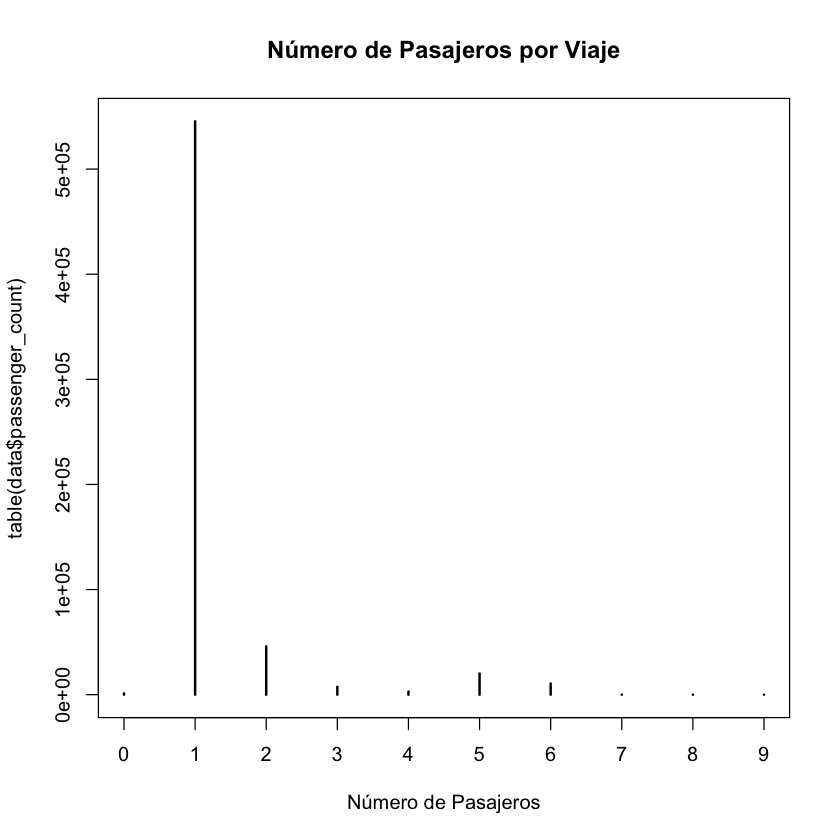

In [7]:
plot(table(data$passenger_count))
title(main="Número de Pasajeros por Viaje", xlab="Número de Pasajeros", ylab= NULL)

In [8]:
summary(data$passenger_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   1.000   1.319   1.000   9.000 

#### Trip Distance

¿Cuántas millas recorren en general los neoyorquinos por viaje? 

In [9]:
mean(data$trip_distance)

[1] 2.864742

Son como 5 km por viaje —no es mucho. 

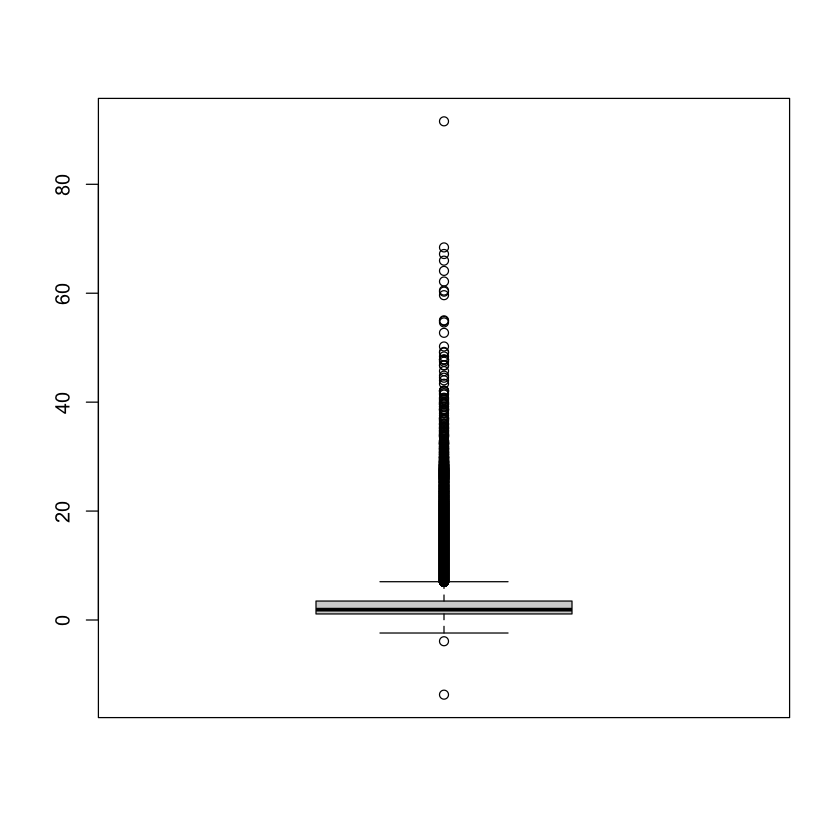

In [10]:
boxplot(data$trip_distance)

Evaluando el cambio en las distancias recorridas por mes. 

In [14]:
dist_sept <- mean(data[data$month == 'Septiembre', 4])
dist_oct <- mean(data[data$month == 'Octubre', 4])
dist_nov <- mean(data[data$month == 'Noviembre', 4])
dist_dic <- mean(data[data$month == 'Diciembre', 4])

In [15]:
meses <- c("Septiembre", "Octubre", "Noviembre", "Diciembre")
promedios <- c(dist_sept, dist_oct, dist_nov, dist_dic)

In [16]:
distancias <- data.frame(meses, promedios)

In [17]:
distancias

meses,promedios
<chr>,<dbl>
Septiembre,3.105578
Octubre,2.822781
Noviembre,2.787599
Diciembre,2.744036


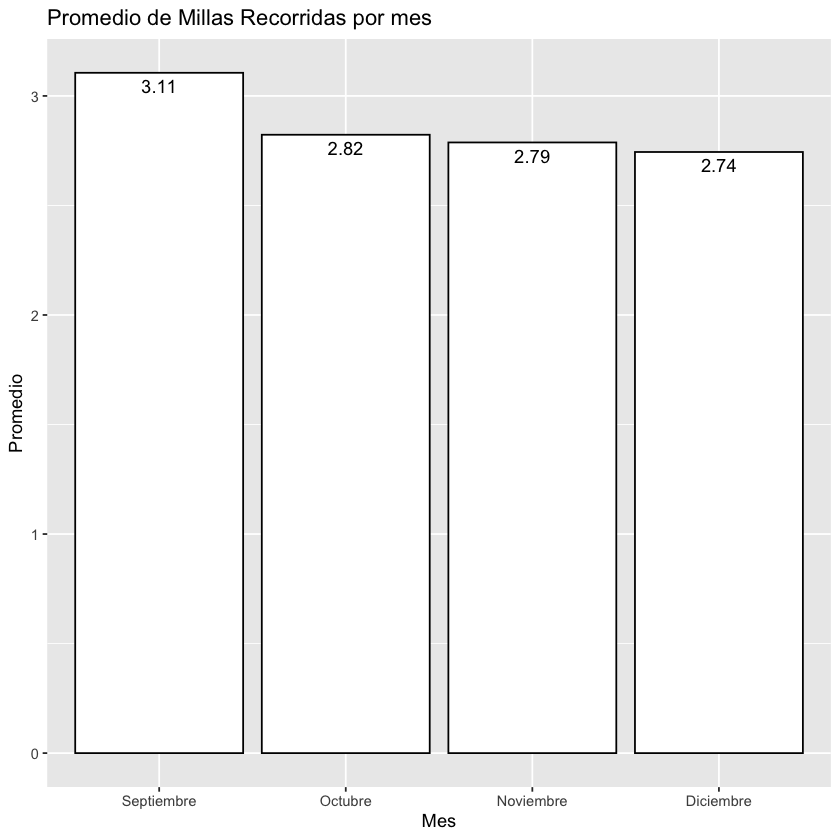

In [18]:
ggplot(distancias, aes(x = factor(meses, level = c('Septiembre','Octubre','Noviembre','Diciembre')), y = promedios)) +
  labs(x='Mes', y='Promedio') +
  geom_col(fill = "white", colour = "black") + 
  geom_text(aes(label = round(promedios,2)), vjust = 1.5, colour = "black") +
  ggtitle("Promedio de Millas Recorridas por mes") +
  theme_gray()


In [79]:
ggsave(
  'promedio_millas',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image



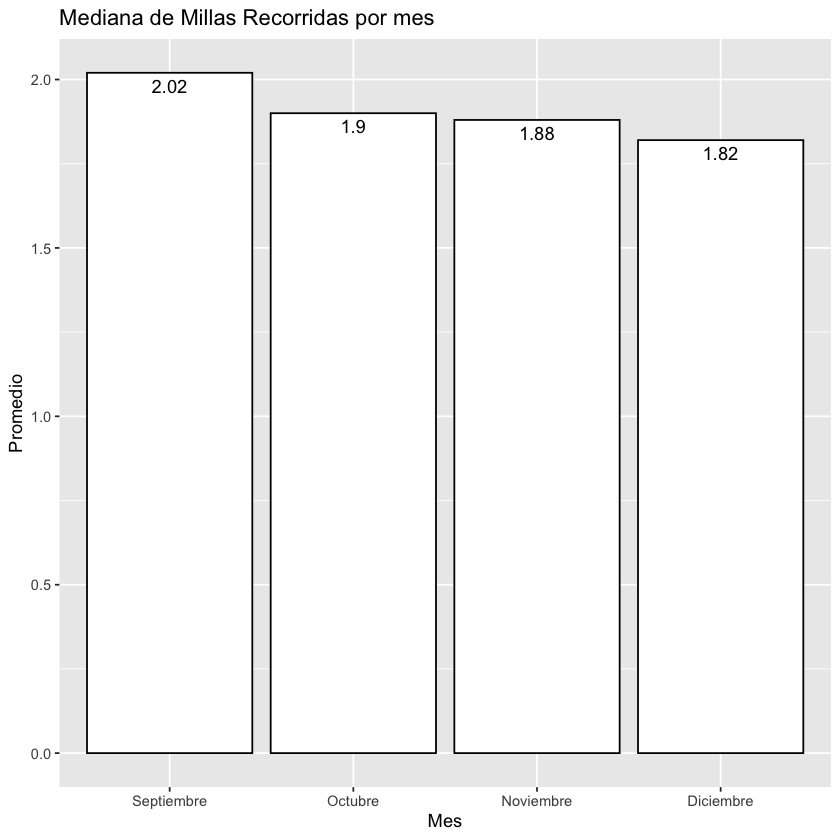

In [28]:
dist_sept <- median(data[data$month == 'Septiembre', 4])
dist_oct <- median(data[data$month == 'Octubre', 4])
dist_nov <- median(data[data$month == 'Noviembre', 4])
dist_dic <- median(data[data$month == 'Diciembre', 4])

meses <- c("Septiembre", "Octubre", "Noviembre", "Diciembre")
promedios <- c(dist_sept, dist_oct, dist_nov, dist_dic)
distancias <- data.frame(meses, promedios)

ggplot(distancias, aes(x = factor(meses, level = c('Septiembre','Octubre','Noviembre','Diciembre')), y = promedios)) +
  labs(x='Mes', y='Promedio') +
  geom_col(fill = "white", colour = "black") + 
  geom_text(aes(label = round(promedios,2)), vjust = 1.5, colour = "black") +
  ggtitle("Mediana de Millas Recorridas por mes") +
  theme_gray()


In [29]:
ggsave(
  'mediana_millas_v2.png',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image



#### Total amount. 

In [19]:
summary(data$total_amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.06    9.95   14.00   17.54   21.00  499.00 

In [83]:
#voy a reusar el código

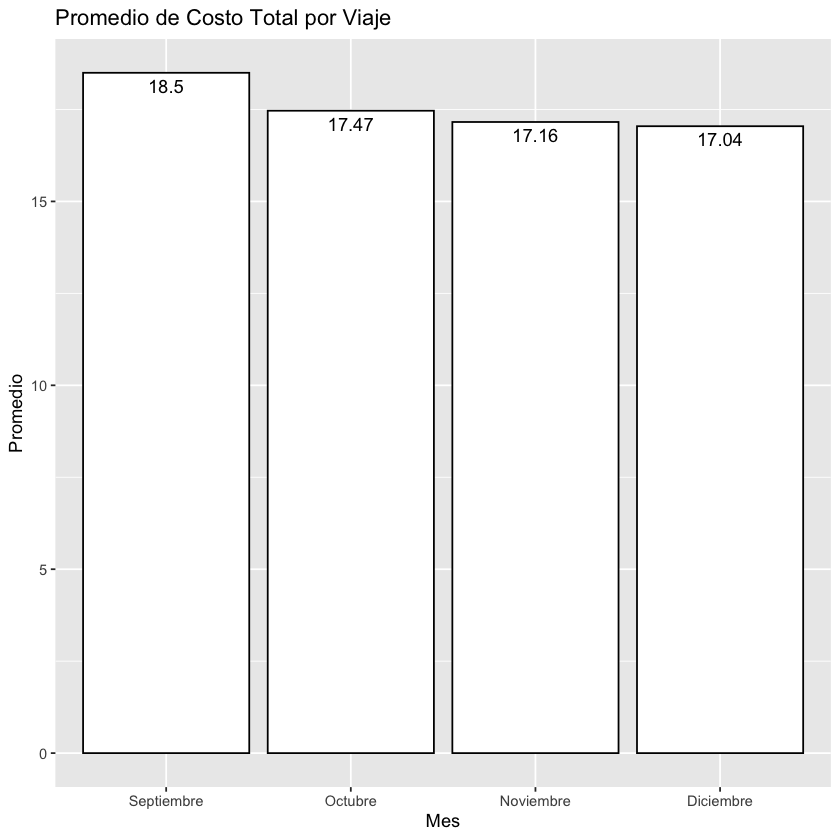

In [84]:
dist_sept <- mean(data[data$month == 'Septiembre', 7])
dist_oct <- mean(data[data$month == 'Octubre', 7])
dist_nov <- mean(data[data$month == 'Noviembre', 7])
dist_dic <- mean(data[data$month == 'Diciembre', 7])

meses <- c("Septiembre", "Octubre", "Noviembre", "Diciembre")
promedios <- c(dist_sept, dist_oct, dist_nov, dist_dic)
distancias <- data.frame(meses, promedios)

ggplot(distancias, aes(x = factor(meses, level = c('Septiembre','Octubre','Noviembre','Diciembre')), y = promedios)) +
  labs(x='Mes', y='Promedio') +
  geom_col(fill = "white", colour = "black") + 
  geom_text(aes(label = round(promedios,2)), vjust = 1.5, colour = "black") +
  ggtitle("Promedio de Costo Total por Viaje") +
  theme_gray()

In [85]:
ggsave(
  'promedio_costo_total',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image



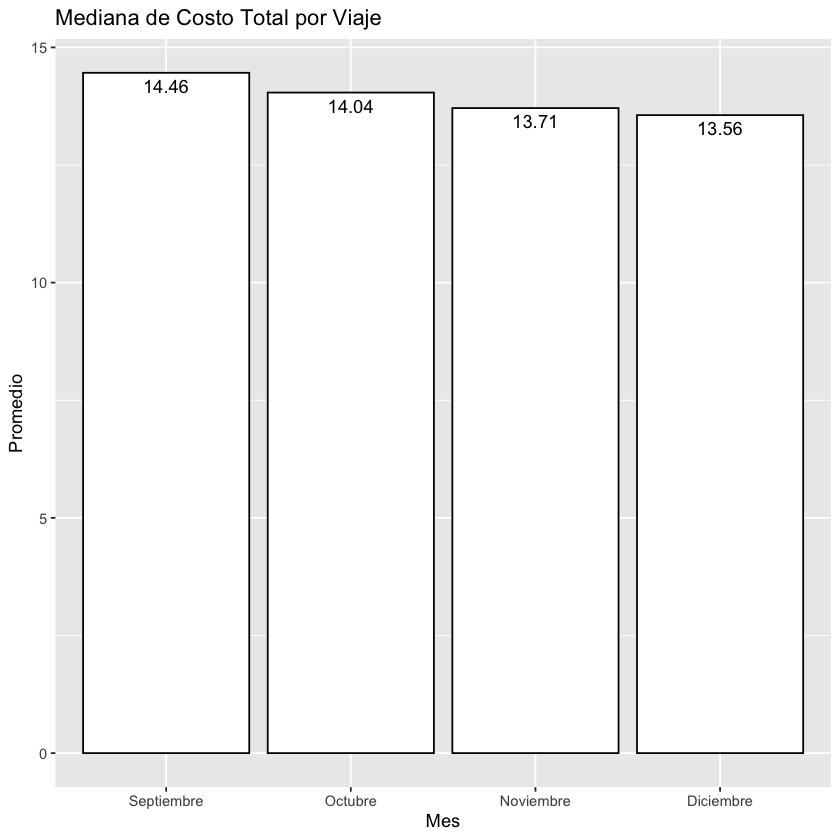

In [86]:
#ahora la mediana
dist_sept <- median(data[data$month == 'Septiembre', 7])
dist_oct <- median(data[data$month == 'Octubre', 7])
dist_nov <- median(data[data$month == 'Noviembre', 7])
dist_dic <- median(data[data$month == 'Diciembre', 7])

meses <- c("Septiembre", "Octubre", "Noviembre", "Diciembre")
promedios <- c(dist_sept, dist_oct, dist_nov, dist_dic)
distancias <- data.frame(meses, promedios)

ggplot(distancias, aes(x = factor(meses, level = c('Septiembre','Octubre','Noviembre','Diciembre')), y = promedios)) +
  labs(x='Mes', y='Promedio') +
  geom_col(fill = "white", colour = "black") + 
  geom_text(aes(label = round(promedios,2)), vjust = 1.5, colour = "black") +
  ggtitle("Mediana de Costo Total por Viaje") +
  theme_gray()

In [87]:
ggsave(
  'mediana_costo_total',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image



### Veamos lo de las propinas

In [20]:
summary(data$tip_pct)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000415 0.1520913 0.1666667 0.1627321 0.1666667 0.9915014 

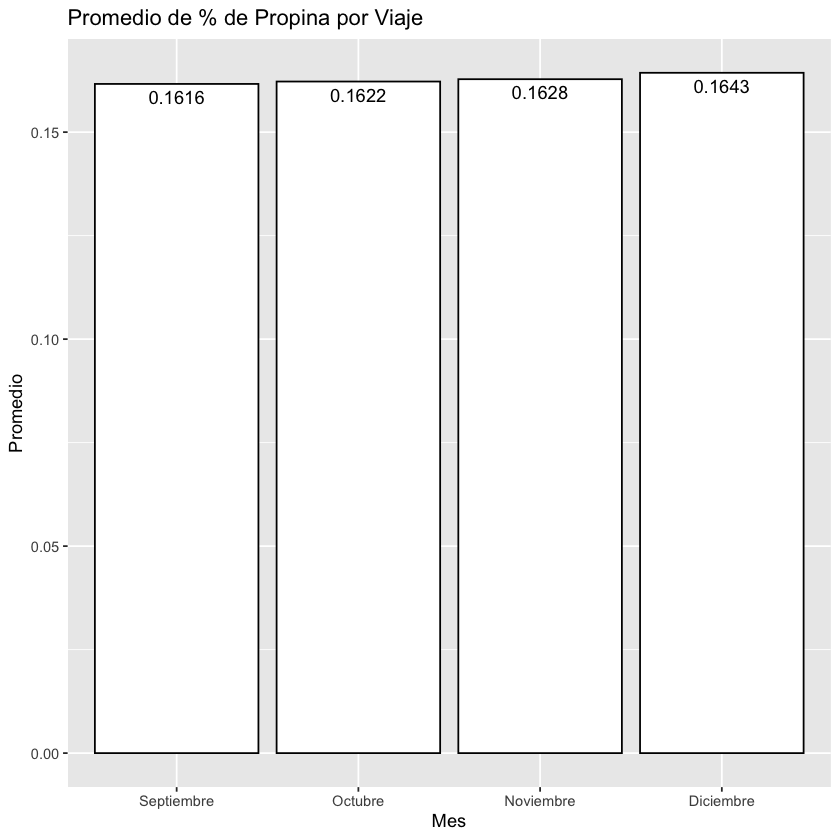

In [93]:
dist_sept <- mean(data[data$month == 'Septiembre', 11])
dist_oct <- mean(data[data$month == 'Octubre', 11])
dist_nov <- mean(data[data$month == 'Noviembre', 11])
dist_dic <- mean(data[data$month == 'Diciembre', 11])

meses <- c("Septiembre", "Octubre", "Noviembre", "Diciembre")
promedios <- c(dist_sept, dist_oct, dist_nov, dist_dic)
distancias <- data.frame(meses, promedios)

ggplot(distancias, aes(x = factor(meses, level = c('Septiembre','Octubre','Noviembre','Diciembre')), y = promedios)) +
  labs(x='Mes', y='Promedio') +
  geom_col(fill = "white", colour = "black") + 
  geom_text(aes(label = round(promedios,4)), vjust = 1.5, colour = "black") +
  ggtitle("Promedio de % de Propina por Viaje") +
  theme_gray()

In [94]:
ggsave(
  'promedio__REAL__REAL_propina',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image



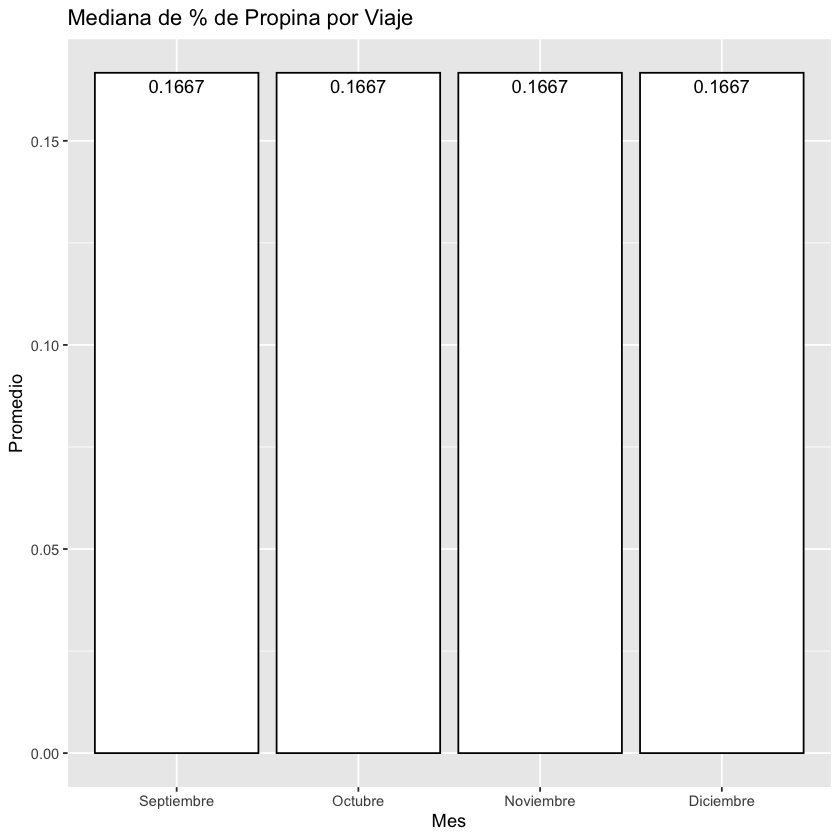

In [95]:
#ahora la mediana
dist_sept <- median(data[data$month == 'Septiembre', 11])
dist_oct <- median(data[data$month == 'Octubre', 11])
dist_nov <- median(data[data$month == 'Noviembre', 11])
dist_dic <- median(data[data$month == 'Diciembre', 11])

meses <- c("Septiembre", "Octubre", "Noviembre", "Diciembre")
promedios <- c(dist_sept, dist_oct, dist_nov, dist_dic)
distancias <- data.frame(meses, promedios)

ggplot(distancias, aes(x = factor(meses, level = c('Septiembre','Octubre','Noviembre','Diciembre')), y = promedios)) +
  labs(x='Mes', y='Promedio') +
  geom_col(fill = "white", colour = "black") + 
  geom_text(aes(label = round(promedios,4)), vjust = 1.5, colour = "black") +
  ggtitle("Mediana de % de Propina por Viaje") +
  theme_gray()

In [96]:
ggsave(
  'MEDIANA_EN_SERIO_propina',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

#interesante, en diciembre dan un poco más de propina

Saving 7 x 7 in image



### Analicemos la duración de los viajes. 

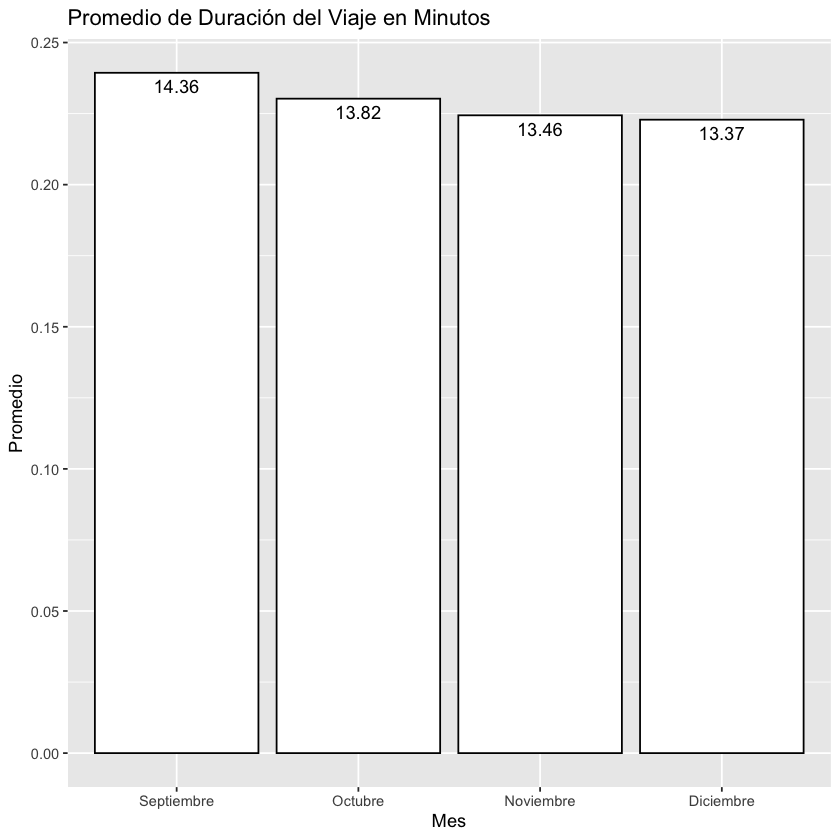

In [97]:
dist_sept <- mean(data[data$month == 'Septiembre', 10])
dist_oct <- mean(data[data$month == 'Octubre', 10])
dist_nov <- mean(data[data$month == 'Noviembre', 10])
dist_dic <- mean(data[data$month == 'Diciembre', 10])

meses <- c("Septiembre", "Octubre", "Noviembre", "Diciembre")
promedios <- c(dist_sept, dist_oct, dist_nov, dist_dic)
distancias <- data.frame(meses, promedios)

ggplot(distancias, aes(x = factor(meses, level = c('Septiembre','Octubre','Noviembre','Diciembre')), y = promedios)) +
  labs(x='Mes', y='Promedio') +
  geom_col(fill = "white", colour = "black") + 
  geom_text(aes(label = round(promedios*60,2)), vjust = 1.5, colour = "black") +
  ggtitle("Promedio de Duración del Viaje en Minutos") +
  theme_gray()

In [98]:
ggsave(
  'promedio_duracion',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image



##### Ahora la mediana

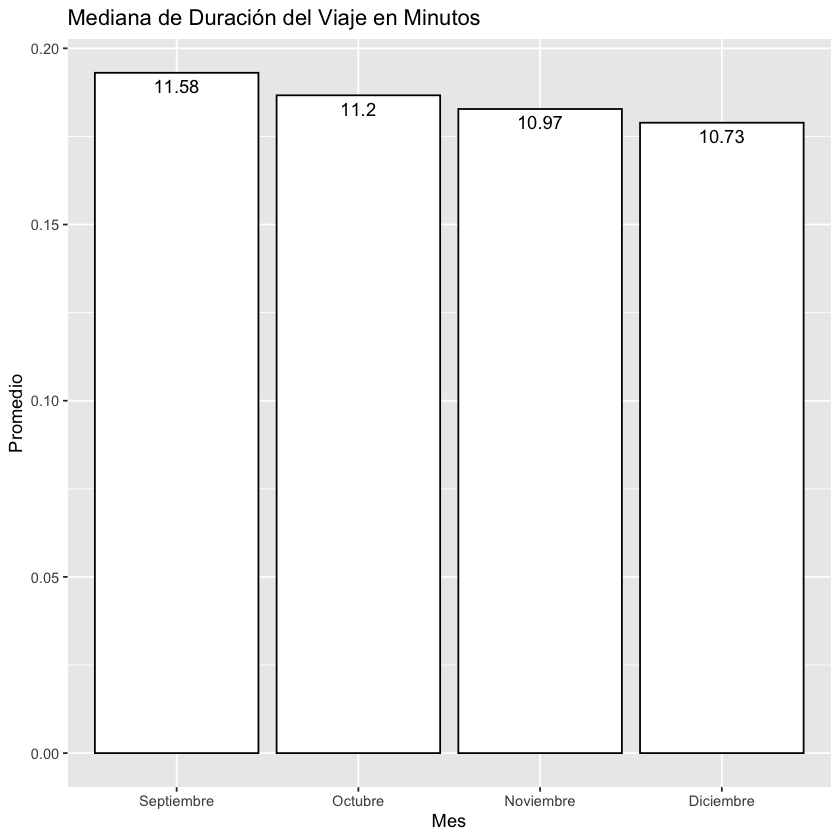

In [99]:
dist_sept <- median(data[data$month == 'Septiembre', 10])
dist_oct <- median(data[data$month == 'Octubre', 10])
dist_nov <- median(data[data$month == 'Noviembre', 10])
dist_dic <- median(data[data$month == 'Diciembre', 10])

meses <- c("Septiembre", "Octubre", "Noviembre", "Diciembre")
promedios <- c(dist_sept, dist_oct, dist_nov, dist_dic)
distancias <- data.frame(meses, promedios)

ggplot(distancias, aes(x = factor(meses, level = c('Septiembre','Octubre','Noviembre','Diciembre')), y = promedios)) +
  labs(x='Mes', y='Promedio') +
  geom_col(fill = "white", colour = "black") + 
  geom_text(aes(label = round(promedios*60,2)), vjust = 1.5, colour = "black") +
  ggtitle("Mediana de Duración del Viaje en Minutos") +
  theme_gray()

In [100]:
ggsave(
  'mediana_duracion',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image



#### Tipo de Pago

In [101]:
sept <- data[data$month == 'Septiembre',8, drop=FALSE]
table(sept$payment_type)


     1      2 
156415      4 

In [102]:
156415 / nrow(sept)

[1] 0.9999744

In [103]:
oct <- data[data$month == 'Octubre',8, drop=FALSE]
table(oct$payment_type)


     1      2      3 
166050      5      1 

In [104]:
166050 / nrow(oct)

[1] 0.9999639

In [105]:
nov <- data[data$month == 'Noviembre',8, drop=FALSE]
table(nov$payment_type)


     1      2      3 
158018      4      1 

In [106]:
158018 / nrow(nov)

[1] 0.9999684

In [107]:
dic <- data[data$month == 'Diciembre',8, drop=FALSE]
table(dic$payment_type)


     1      2      3      4 
153370      4      1      1 

In [108]:
153370 / nrow(dic)

[1] 0.9999609

#### Vemos que el 99% de los pagos son con tarjeta de crédito

In [109]:
#construyendo los vectores
tipo_pago <- rep(c("Tarjeta Crédito", "Efectivo"),4)
mes <- rep(c("Septiembre", "Octubre", "Noviembre", "Diciembre"), each=2)
proporciones <- rep(c(.99,.01), 4)

pago <- data.frame(tipo_pago, mes, proporciones)
head(pago)

,tipo_pago,mes,proporciones
,<chr>,<chr>,<dbl>
1,Tarjeta Crédito,Septiembre,0.99
2,Efectivo,Septiembre,0.01
3,Tarjeta Crédito,Octubre,0.99
4,Efectivo,Octubre,0.01
5,Tarjeta Crédito,Noviembre,0.99
6,Efectivo,Noviembre,0.01


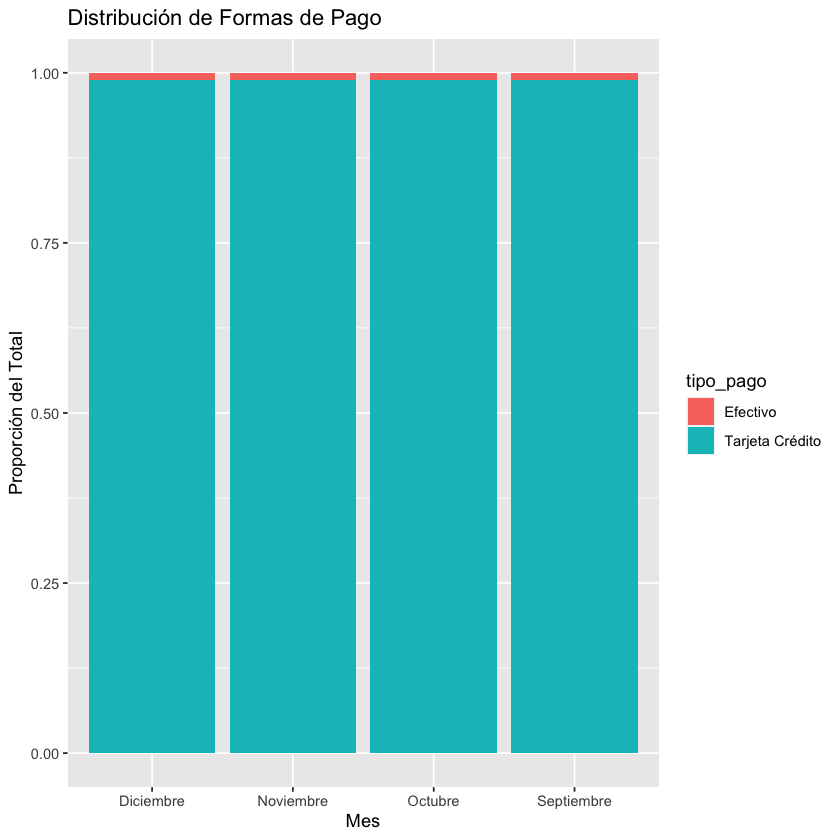

In [110]:
ggplot(pago, aes(x = mes, y = proporciones, fill = tipo_pago)) +
  geom_col() + 
  ggtitle("Distribución de Formas de Pago") +
  labs(x = "Mes", y = "Proporción del Total")
  #geom_text(aes(y = y_label, label = proporciones), vjust = 1.5, colour = "white")

In [111]:
ggsave(
  'formas_pago',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image



### Tipo de Viaje. 

In [112]:
sept <- data[data$month == 'Septiembre',9, drop=FALSE]
table(sept$trip_type)


     1      2 
153758   2661 

In [113]:
153758 / nrow(sept)

[1] 0.982988

In [114]:
oct <- data[data$month == 'Octubre',9, drop=FALSE]
table(oct$trip_type)


     1      2 
163586   2470 

In [115]:
163586 / nrow(oct)

[1] 0.9851255

In [116]:
nov <- data[data$month == 'Noviembre',9, drop=FALSE]
table(nov$trip_type)


     1      2 
155729   2294 

In [117]:
155729 / nrow(nov)

[1] 0.9854831

In [118]:
dic <- data[data$month == 'Diciembre',9, drop=FALSE]
table(dic$trip_type)


     1      2 
151139   2237 

In [119]:
151139 / nrow(dic)

[1] 0.9854149

In [120]:
tipo_viaje <- rep(c("Street-Hail", "Dispatch"),4)
mes <- rep(c("Septiembre", "Octubre", "Noviembre", "Diciembre"), each=2)
proporciones <- c(.983, 1-.983, .985, .015, .985, .015, .985, .015 )

viajes <- data.frame(tipo_viaje, mes, proporciones)
head(viajes)

,tipo_viaje,mes,proporciones
,<chr>,<chr>,<dbl>
1,Street-Hail,Septiembre,0.983
2,Dispatch,Septiembre,0.017
3,Street-Hail,Octubre,0.985
4,Dispatch,Octubre,0.015
5,Street-Hail,Noviembre,0.985
6,Dispatch,Noviembre,0.015


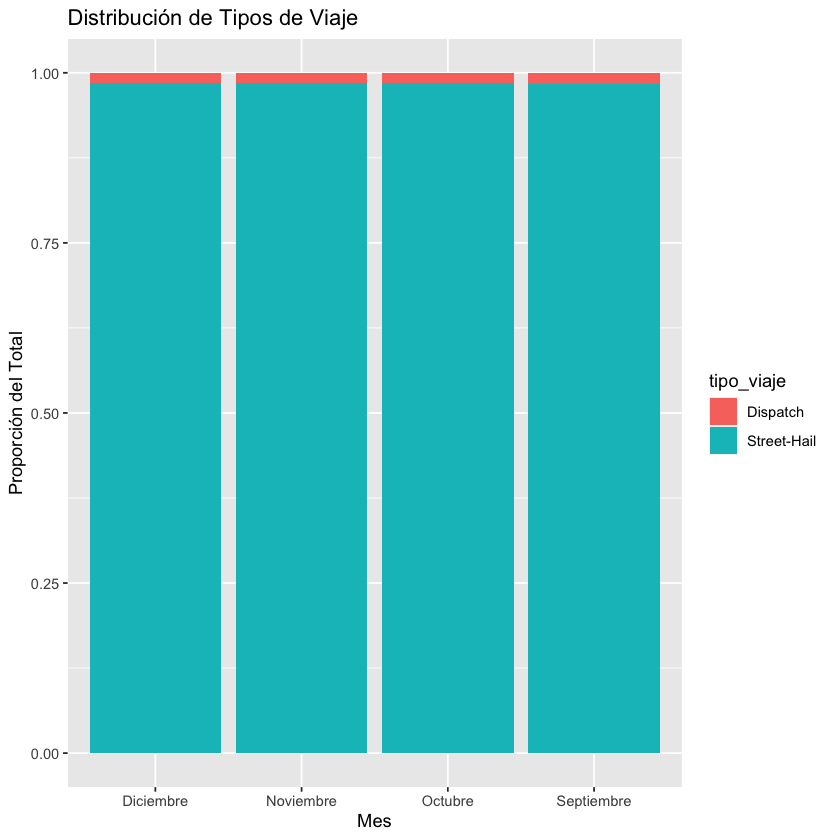

In [121]:
ggplot(viajes, aes(x = mes, y = proporciones, fill = tipo_viaje)) +
  geom_col() + 
  ggtitle("Distribución de Tipos de Viaje") +
  labs(x = "Mes", y = "Proporción del Total")


In [122]:
ggsave(
  'tipo_de_viaje',
  plot = last_plot(),
  device = 'png',
  path = '/Users/enriqueortiz/Downloads/graphs'
  )

Saving 7 x 7 in image



### Este  notebook termina aquí. Se limita al análisis descriptivo. En otro notebook haré más detalles un poco más interesantes. 